In [6]:
import gymnasium as gym
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [7]:
env = gym.make("FrozenLake-v1", is_slippery=False, map_name="4x4")

Episode 0: reward 0, epsilon=0.995


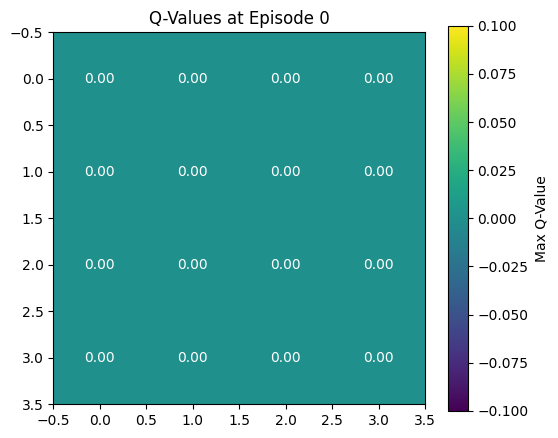

Episode 200: reward 0, epsilon=0.365
Episode 400: reward 1, epsilon=0.134
Episode 600: reward 1, epsilon=0.050
Episode 800: reward 1, epsilon=0.050
Episode 1000: reward 1, epsilon=0.050


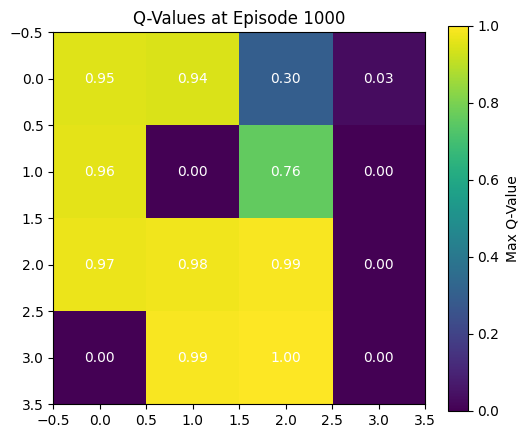

Episode 1200: reward 1, epsilon=0.050
Episode 1400: reward 1, epsilon=0.050
Episode 1600: reward 1, epsilon=0.050
Episode 1800: reward 1, epsilon=0.050
Episode 2000: reward 1, epsilon=0.050


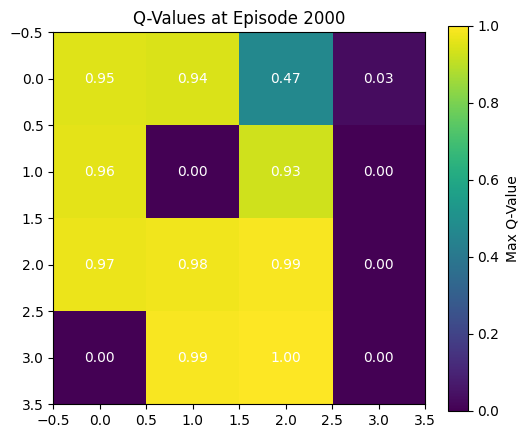

Episode 2200: reward 0, epsilon=0.050
Episode 2400: reward 1, epsilon=0.050
Episode 2600: reward 1, epsilon=0.050
Episode 2800: reward 1, epsilon=0.050
Episode 3000: reward 1, epsilon=0.050


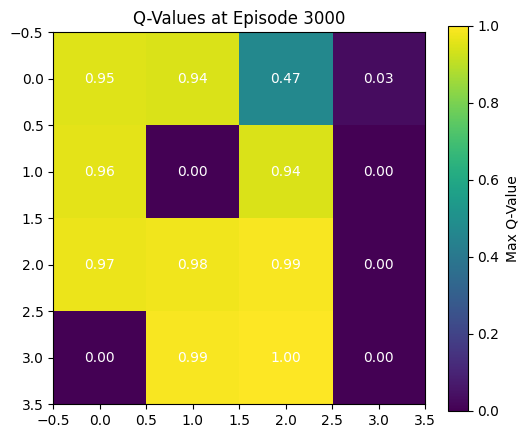

Episode 3200: reward 1, epsilon=0.050
Episode 3400: reward 1, epsilon=0.050
Episode 3600: reward 1, epsilon=0.050
Episode 3800: reward 0, epsilon=0.050
Episode 4000: reward 1, epsilon=0.050


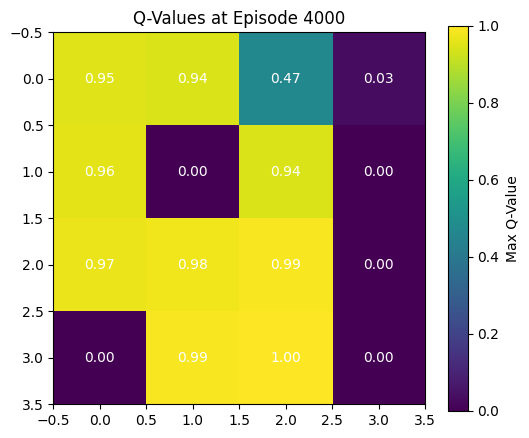

Episode 4200: reward 0, epsilon=0.050
Episode 4400: reward 1, epsilon=0.050
Episode 4600: reward 1, epsilon=0.050
Episode 4800: reward 1, epsilon=0.050


In [8]:
np.random.seed(42)
episodes = 5000
reward_history = []
Q = defaultdict(float)
gamma = 0.99
alpha = 0.3
epsilon = 1.0 
epsilon_min = 0.05
epsilon_decay = 0.995

def get_best_action(state):
    # Retrieve Q-values for all actions in this state
    # If state is new, this returns 0.0 for all actions
    q_values = [Q[(state, a)] for a in range(env.action_space.n)]
    
    # Return the index of the highest value
    return np.argmax(q_values)

rows, cols = 4,4
def plot_q_heatmap(Q, episode):
    # 1. Create a grid to hold the "Best Value" for each state
    value_grid = np.zeros((rows, cols))
    
    # 2. Fill the grid
    for r in range(rows):
        for c in range(cols):
            # Calculate state index (assuming row-major order: state = r * cols + c)
            # If your 'state' variable is a tuple (r,c), just use Q[(r,c), a]
            state_index = r * cols + c
            
            # Get max Q-value for this state (0 if state not visited yet)
            q_values = [Q[(state_index, a)] for a in range(env.action_space.n)]
            value_grid[r, c] = max(q_values) if q_values else 0
            
    # 3. Plot
    plt.figure(figsize=(6, 5))
    plt.imshow(value_grid, cmap='viridis') # 'viridis' is a good color map
    plt.colorbar(label="Max Q-Value")
    plt.title(f"Q-Values at Episode {episode}")
    
    # Add text annotations
    for r in range(rows):
        for c in range(cols):
            plt.text(c, r, f"{value_grid[r, c]:.2f}", 
                     ha='center', va='center', color='white')
    
    plt.show()


for ep in range(episodes):

    state, info = env.reset(seed=42)
    total_reward = 0
    done = False

    while not done:
        # Step 1: Chose action
        if np.random.rand() < epsilon: 
            action = env.action_space.sample() # Explore
        else:
            action = get_best_action(state)  # Exploit

        # Step 2: Step environment with chosen action
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # Step 3: Calculate Target (The "Reality")
        # We need the max Q-value for the NEXT state
        next_q = [Q[(next_state, a)] for a in range(env.action_space.n)]
        best_next_q = max(next_q)

        # Target = Reward + Discounted Future Value
        # Note: If done, there is no future, so we multiply by (1 - done)
        td_target = reward + (gamma * best_next_q * (1 - done))

        # Step 4: Calculate TD Error
        # TD Error = Target - Current Estimate
        current_q = Q[(state, action)]
        td_error = td_target - current_q
        
        Q[(state, action)] = current_q + (alpha*td_error)

        state = next_state
        total_reward += reward
    
    reward_history.append(total_reward)

    epsilon = max(epsilon_min, epsilon*epsilon_decay)

    if ep %200 ==0:
        print(f"Episode {ep}: reward {total_reward}, epsilon={epsilon:.3f}")

    # inside your loop:
    if ep % 1000 == 0:
        plot_q_heatmap(Q, ep)

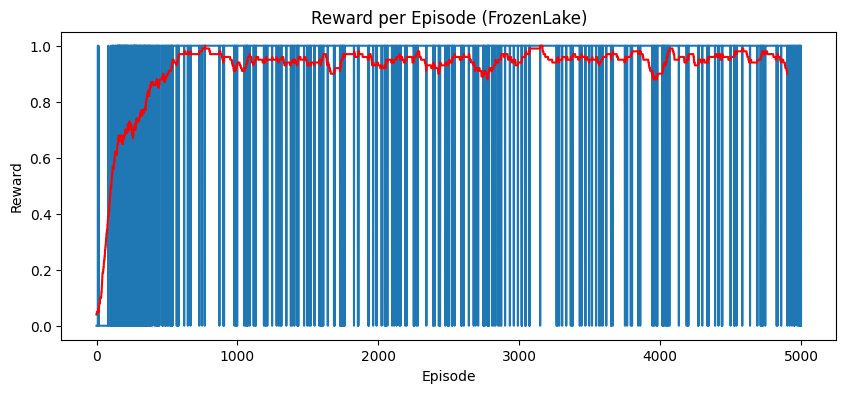

In [9]:
plt.figure(figsize=(10,4))
plt.plot(reward_history)
window = 100
moving_avg = np.convolve(reward_history, np.ones(window)/window, mode='valid')
plt.plot(moving_avg, color='red')
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Reward per Episode (FrozenLake)")
# plt.xlim(4000,5000)
plt.show()


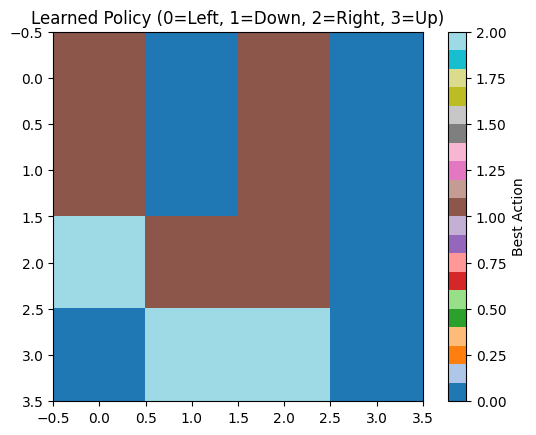

In [10]:
import numpy as np

policy = np.zeros(16, dtype=int)
for s in range(16):
    qs = [Q[(s, a)] for a in range(env.action_space.n)]
    policy[s] = np.argmax(qs)

policy = policy.reshape((4,4))  # FrozenLake is 4×4

plt.imshow(policy, cmap="tab20")
plt.colorbar(label="Best Action")
plt.title("Learned Policy (0=Left, 1=Down, 2=Right, 3=Up)")
plt.show()